<div style="text-align: right">NLP Research, Fall 2021</div>
<div style="text-align: right">Dino Konstantopoulos, 8 October 2021</div>

# Mao Topic Model generators for belief modeling testing

We use a simple LSTM-based net to generate sentences from Mao, then we embed summarized sentences from the text. 

We could also create TOpic Models and then randomly pick words associated with each topic to form gibberish per-topic 
sentences, then we embed summarized sentences from the text.

The goal is to use our belief-modeling technology to recover the summarizes sentences, which should rank high in
terms of beliefs.

# 1. Text corpora
I harvested 6 of Mao's writings from [here](https://www.marxists.org/reference/archive/mao/selected-works/index.htm).

In [1]:
import os
for root, dirs, files in os.walk("c:/Users/Dino/mao"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

c:/Users/Dino/mao\A SINGLE SPARK CAN START A PRAIRIE FIRE.txt
c:/Users/Dino/mao\ANALYSIS OF THE CLASSES IN CHINESE SOCIETY.txt
c:/Users/Dino/mao\BE CONCERNED WITH THE WELL-BEING OF THE MASSES, PAY ATTENTION TO METHODS OF WORK.txt
c:/Users/Dino/mao\ON CORRECTING MISTAKEN IDEAS IN THE PARTY.txt
c:/Users/Dino/mao\REPORT ON AN INVESTIGATION OF THE PEASANT MOVEMENT IN HUNAN.txt
c:/Users/Dino/mao\WHY IS IT THAT RED POLITICAL POWER CAN EXIST IN CHINA.txt


These are the paragraphs, and this is the first one below:

In [2]:
import os
mao_paragraphs = []
for root, dirs, files in os.walk("c:/Users/Dino/mao"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            mao_paragraphs.extend(paragraphs)
            
print(len(mao_paragraphs))
print(mao_paragraphs[0])

c:/Users/Dino/mao\A SINGLE SPARK CAN START A PRAIRIE FIRE.txt
c:/Users/Dino/mao\ANALYSIS OF THE CLASSES IN CHINESE SOCIETY.txt
c:/Users/Dino/mao\BE CONCERNED WITH THE WELL-BEING OF THE MASSES, PAY ATTENTION TO METHODS OF WORK.txt
c:/Users/Dino/mao\ON CORRECTING MISTAKEN IDEAS IN THE PARTY.txt
c:/Users/Dino/mao\REPORT ON AN INVESTIGATION OF THE PEASANT MOVEMENT IN HUNAN.txt
c:/Users/Dino/mao\WHY IS IT THAT RED POLITICAL POWER CAN EXIST IN CHINA.txt
202
Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take. Though they believe that a revolutionary high tide is inevitable, they do not believe it to be imminent. Therefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in t

We see that we have about 200 paragraphs and that the first paragraph is kind of looooooooooooooooooooong. Also, Mao tends to write 
long sentences. So, let's stick to sentences instead:

In [3]:
import os
mao_sentences = []
for root, dirs, files in os.walk("c:/Users/Dino/mao"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            mao_sentences.extend(sentences)
            
print(len(mao_sentences))
print(mao_sentences[0])

c:/Users/Dino/mao\A SINGLE SPARK CAN START A PRAIRIE FIRE.txt
c:/Users/Dino/mao\ANALYSIS OF THE CLASSES IN CHINESE SOCIETY.txt
c:/Users/Dino/mao\BE CONCERNED WITH THE WELL-BEING OF THE MASSES, PAY ATTENTION TO METHODS OF WORK.txt
c:/Users/Dino/mao\ON CORRECTING MISTAKEN IDEAS IN THE PARTY.txt
c:/Users/Dino/mao\REPORT ON AN INVESTIGATION OF THE PEASANT MOVEMENT IN HUNAN.txt
c:/Users/Dino/mao\WHY IS IT THAT RED POLITICAL POWER CAN EXIST IN CHINA.txt
966
Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take


So we have about 1,000 sentences. Let's do some exploratory data analysis (EDA) so that we have all the intuitions about what our sentences contain. Let’s create a column that contains the length of each sentence to get an idea about the average number of words used in a sentence.

In [4]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

mao_df = pd.DataFrame(mao_sentences, columns = ['Sentence'])
mao_df.head()

d:\Anaconda3.5.1\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Sentence
0,Some comrades in our Party still do not know h...
1,Though they believe that a revolutionary high ...
2,"Therefore, they disapprove of the plan to take..."
3,"They seem to think that, since the revolutiona..."
4,"Instead, they want to extend our political inf..."


Text(0.5, 1.0, 'Distribution of number of words in each sentence')

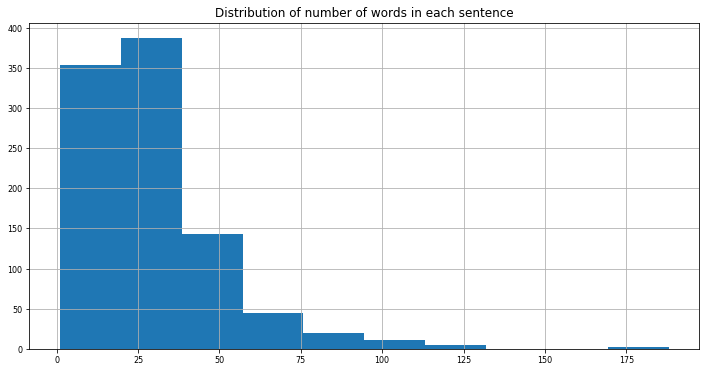

In [5]:
mao_df['NumWords'] = mao_df['Sentence'].apply(lambda x: len(x.split()))
mao_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

Wow, 25 words on average! Now, let's build a word cloud to see the most frequent words. 

In [6]:
all_words = ''.join([word for word in mao_df['Sentence']]).replace('\n', ' ')
all_words[0:1000]

'Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to takeThough they believe that a revolutionary high tide is inevitable, they do not believe it to be imminentTherefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in the guerrilla areas, they do not have a deep understanding of the idea of accelerating the nation-wide revolutionary high tide through the consolidation and expansion of Red political powerThey seem to think that, since the revolutionary high tide is still remote, it will be labour lost to attempt to establish political power by hard workInstead, they want to extend our political influence through the easier method of roving guerrilla actions, and, once th

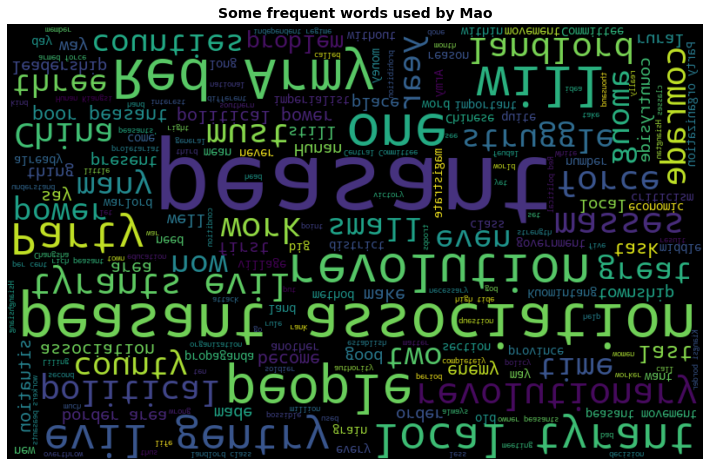

In [7]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear", origin='upper')
plt.axis('off')
plt.title("Some frequent words used by Mao", weight='bold', fontsize=14)
plt.savefig("data/maocloud.png", dpi=200)

I don't know why my anaconda mirror-flips my images :-(

In [8]:
from PIL import Image
from PIL import ImageOps

im = Image.open("data/maocloud.png")
im = ImageOps.mirror(im)
#im.save("lena_mirror.png")
im.show()

This works better:

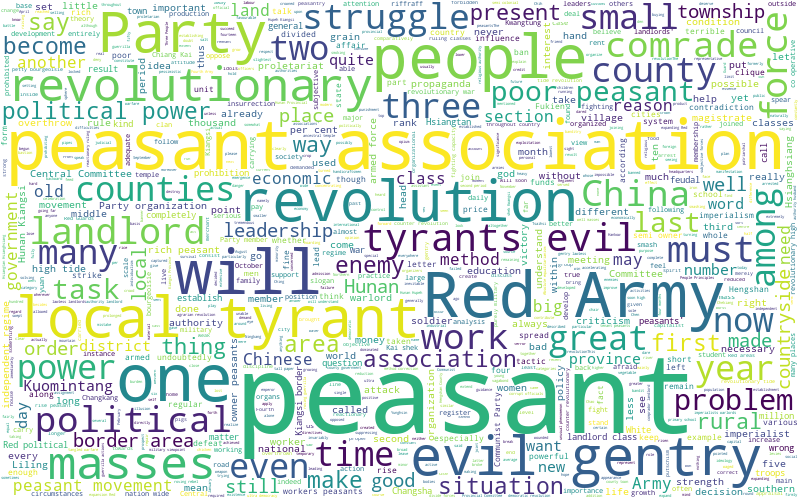

In [9]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

Let's do some cleaning operations like turning all words to lowercase, remove punctuation and non-ASCII characters which are irrelevant for modeling topics.

In [7]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
mao_df['Sentence2'] = mao_df['Sentence'].apply(normalize_texts)
mao_df.head()
mao_df['Sentence2'] = mao_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

Top 30 words used with their frequencies:

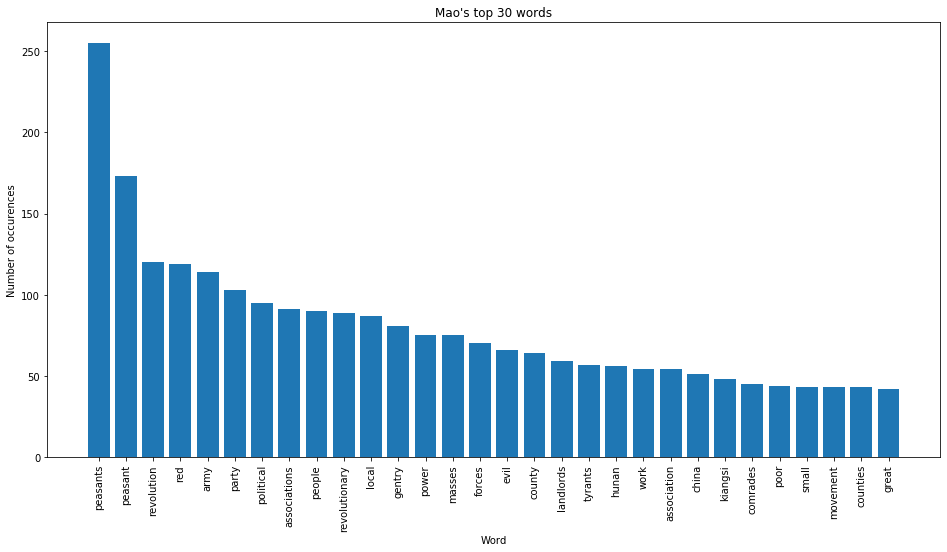

In [11]:
def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(mao_df['Sentence2'], 30):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Mao's top 30 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

Some interesting conclusions: We also need to **stem** words so that `peasants` and `peasant` represents the same occurrence. Also, some words needs to be grouped into bigrams, such as `red army`.

# 2. Text summarization with Gensim

This summarization implementation from Gensim is based on a variation of a popular algorithm called TextRank.

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dino\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
mao_books = [0,1,2,3,4,5]
i = 0
for root, dirs, files in os.walk("c:/Users/Dino/mao"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                all_sentences = input.read()
                mao_books[i] = all_sentences
                i += 1
            
print(len(mao_books))
print(len(mao_books[0]))
print(mao_books[0][0:200])

c:/Users/Dino/mao\A SINGLE SPARK CAN START A PRAIRIE FIRE.txt
c:/Users/Dino/mao\ANALYSIS OF THE CLASSES IN CHINESE SOCIETY.txt
c:/Users/Dino/mao\BE CONCERNED WITH THE WELL-BEING OF THE MASSES, PAY ATTENTION TO METHODS OF WORK.txt
c:/Users/Dino/mao\ON CORRECTING MISTAKEN IDEAS IN THE PARTY.txt
c:/Users/Dino/mao\REPORT ON AN INVESTIGATION OF THE PEASANT MOVEMENT IN HUNAN.txt
c:/Users/Dino/mao\WHY IS IT THAT RED POLITICAL POWER CAN EXIST IN CHINA.txt
6
27193
Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take. Though they believe that a revolutionary h


In [9]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', mao_books[0])
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()
DOCUMENT[0:200]

'Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take. Though they believe that a revolutionary h'

In [22]:
from gensim.summarization import summarize
print(summarize(DOCUMENT, ratio=0.1, split=False))

Therefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in the guerrilla areas, they do not have a deep understanding of the idea of accelerating the nation-wide revolutionary high tide through the consolidation and expansion of Red political power.
Instead, they want to extend our political influence through the easier method of roving guerrilla actions, and, once the masses throughout the country have been won over, or more or less won over, they want to launch a nation-wide armed insurrection which, with the participation of the Red Army, would become a great nationwide revolution.
Fourthly, one will understand another unusual phenomenon, which is also absent outside China, and which follows from the first (that in China alone there is prolonged and tangled warfare 

In [23]:
from gensim.summarization import summarize
print(summarize(DOCUMENT, ratio=0.01, split=False))

And sixthly, one will also understand that the policy which merely calls for roving guerrilla actions cannot accomplish the task of accelerating this nation-wide revolutionary high tide, while the kind of policy adopted by Chu Teh and Mao Tse-tung and also by Fang Chih-min [1] is undoubtedly correct--that is, the policy of establishing base areas; of systematically setting up political power; of deepening the agrarian revolution; of expanding the people's armed forces by a comprehensive process of building up first the township Red Guards, then the district Red Guards, then the county Red Guards, then the local Red Army troops, all the way up to the regular Red Army troops; of spreading political power by advancing in a series of waves; etc., etc.


In [27]:
print(summarize(DOCUMENT, word_count=75, split=False))

And sixthly, one will also understand that the policy which merely calls for roving guerrilla actions cannot accomplish the task of accelerating this nation-wide revolutionary high tide, while the kind of policy adopted by Chu Teh and Mao Tse-tung and also by Fang Chih-min [1] is undoubtedly correct--that is, the policy of establishing base areas; of systematically setting up political power; of deepening the agrarian revolution; of expanding the people's armed forces by a comprehensive process of building up first the township Red Guards, then the district Red Guards, then the county Red Guards, then the local Red Army troops, all the way up to the regular Red Army troops; of spreading political power by advancing in a series of waves; etc., etc.


In [28]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

148

In [30]:
sentences[0]

'Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take.'

In [32]:
sentences[100]

'For example, when we first captured the county town of Yunghsin in the Hunan-Kiangsi border area, we divided the forces of the 29th and 31st Regiments within the boundaries of Yunghsin County.'

# 3. Text summarization with Latent Semantic Analysis
Sentence words can be extracted to form the term-document matrix.

We then apply low-rank Singular Value Decomposition to this matrix. The core principle behind Latent Semantic Analysis (LSA) is that in any document, there exists a latent structure among terms that are related contextually and hence should also be correlated in the same singular space.

The main idea is to use SVD (recall M = USVT) so that U
and V are the orthogonal matrices and S is the diagonal matrix, which can also be
represented as a vector of the singular values. 

The original matrix can be represented as
a term-document matrix where the rows are terms and each column is a document, i.e.,
a sentence from our document in this case. The values can be any type of weighting like
Bag of Words model-based frequencies, TF-IDFs, or binary occurrences.

In [33]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['comrades party still know appraise current situation correctly settle attendant question action take',
       'though believe revolutionary high tide inevitable believe imminent',
       'therefore disapprove plan take kiangsi approve roving guerrilla actions three areas borders fukien kwangtung kiangsi time deep understanding means establish red political power guerrilla areas deep understanding idea accelerating nationwide revolutionary high tide consolidation expansion red political power'],
      dtype='<U551')

Let's vectorize our normalized sentences using TF-IDF feature engineering. We keep things simple and don’t filter out any words based on document frequency. But feel free to try that out and maybe even leverage n-grams as features.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(982, 148)


,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
abandon,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
able,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
abovementioned,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
absent,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
accelerating,0.00,0.0,0.15,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
accomplish,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
accomplishing,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
accord,0.00,0.0,0.00,0.0,0.0,0.31,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
according,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
action,0.28,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21,0.0


In [35]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [36]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(982, 3) (3,) (3, 148)


In [37]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [38]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([1.99004341e-01, 3.23642007e-01, 3.44728089e-01, 2.81437780e-01,
       2.48378164e-01, 2.67820488e-01, 1.42773845e-01, 1.81065018e-01,
       1.35099461e-01, 1.77443354e-01, 3.10845755e-01, 3.87792255e-01,
       4.04681971e-01, 1.62702501e-01, 1.40905120e-01, 2.31219182e-01,
       4.28884738e-01, 3.33887756e-01, 5.50108999e-02, 4.60060570e-02,
       2.66295359e-01, 1.85526898e-01, 4.70816279e-01, 1.05649782e-01,
       3.37906959e-01, 4.88296979e-01, 2.92060457e-16, 3.25635075e-01,
       1.88341118e-01, 2.50917410e-02, 2.49164424e-02, 2.46797026e-01,
       2.07772956e-01, 5.29212550e-02, 5.77076873e-17, 1.36413217e-01,
       2.36428446e-01, 7.76956072e-02, 2.66840206e-01, 2.69752683e-01,
       3.59612596e-01, 3.53645857e-01, 2.55460435e-17, 1.72075804e-01,
       2.27686905e-01, 1.08788619e-01, 4.79431980e-01, 1.25291152e-01,
       1.37690609e-01, 1.23435785e-01, 7.40025684e-02, 7.37378587e-02,
       8.96801352e-02, 1.05250534e-01, 7.89037154e-02, 3.84452607e-02,
      

In [39]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [40]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Although the subjective forces of the revolution in China are now weak, so also are all organizations (organs of political power, armed forces, political parties, etc.)
In China the revolution will undoubtedly move towards a high tide more rapidly, for although the subjective forces of the revolution at present are weak, the forces of the counter-revolution are relatively weak too.
The question whether there will soon be a revolutionary high tide in China can be decided only by making a detailed examination to ascertain whether the contradictions leading to a revolutionary high tide are really developing.
We shall also see that the high tide of revolution against the imperialists, the warlords and the landlords is inevitable, and will come very soon.
The gist of the above was already contained in the letter from the Front Committee to the Central Committee on April 5, 1929, which reads in part: The Central Committee's letter [dated February 9, 1929] makes too pessimistic an appraisal o

# 4. Text summarization with TextRank
The TextRank summarization algorithm internally uses the popular PageRank algorithm, which is used by Google for ranking websites and pages. This is used by the Google search engine when providing relevant web pages based on search queries. To understand TextRank better, we need to understand some of the concepts surrounding PageRank. The core algorithm in PageRank is a graph-based scoring or ranking algorithm, where pages are scored or ranked based on their importance.

- Tokenize and extract sentences from the document to be summarized.
- Decide on the number of sentences, k, that we want in the final summary
- Build a document-term feature matrix using weights like TF-IDF or Bag of Words.
- Compute a document similarity matrix by multiplying the matrix by its transpose.
- Use these documents (sentences in our case) as the vertices and the similarities between each pair of documents as the weight or score coefficient we talked about earlier and feed them to the PageRank algorithm.
- Get the score for each sentence.
- Rank the sentences based on score and return the top k sentences.

In [41]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(148, 148)


array([[1.   , 0.   , 0.033, ..., 0.   , 0.059, 0.   ],
       [0.   , 1.   , 0.066, ..., 0.   , 0.056, 0.021],
       [0.033, 0.066, 1.   , ..., 0.   , 0.026, 0.01 ],
       ...,
       [0.   , 0.   , 0.   , ..., 1.   , 0.   , 0.   ],
       [0.059, 0.056, 0.026, ..., 0.   , 1.   , 0.014],
       [0.   , 0.021, 0.01 , ..., 0.   , 0.014, 1.   ]])

In [42]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

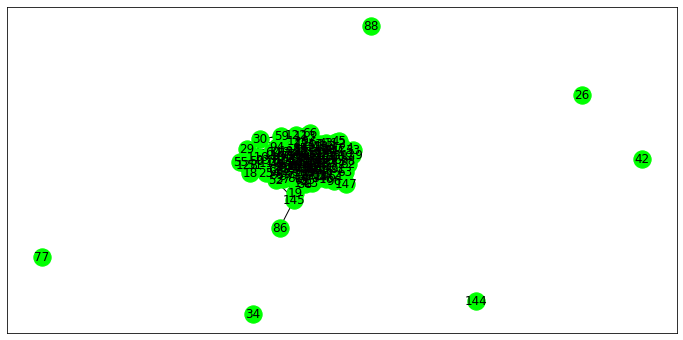

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [44]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.011637953691729253, 12),
 (0.011225931705251185, 25),
 (0.011074828474505088, 22),
 (0.011052001925302792, 89),
 (0.010879191021659941, 11),
 (0.010754074843262252, 2),
 (0.010440555367375903, 76),
 (0.010286082576061508, 104),
 (0.010080240590960687, 79),
 (0.009814560419184713, 10)]

In [45]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [46]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Therefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in the guerrilla areas, they do not have a deep understanding of the idea of accelerating the nation-wide revolutionary high tide through the consolidation and expansion of Red political power.
Fifthly, one will understand that in semi-colonial China the establishment and expansion of the Red Army, the guerrilla forces and the Red areas is the highest form of peasant struggle under the leadership of the proletariat, the inevitable outcome of the growth of the semi-colonial peasant struggle, and undoubtedly the most important factor in accelerating the revolutionary high tide throughout the country.
And sixthly, one will also understand that the policy which merely calls for roving guerrilla actions cannot accompli

# 5. Text summarization with classical NLP and Spacy
We use POS knowledge to summarize.

In [47]:
from IPython.display import display, HTML
import spacy
import en_core_web_lg
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk import word_tokenize

In [50]:
nlp = en_core_web_lg.load()
stemmer = SnowballStemmer(language='english')

In [51]:
SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
OBJECTS = ["dobj", "dative", "attr", "oprd"]

def subjects_from_conjunction(subjects):
    additional_subjects= []
    for subject in subjects:
        # get everything to the right of the subject
        rights = list(subject.rights)
        right_dendencies = {token.lower_ for token in rights}
        if "and" in right_dendencies:
            additional_subjects.extend([token for token in rights if token.dep_ in SUBJECTS or token.pos_ == "NOUN"])
            if len(additional_subjects) > 0:
                additional_subjects.extend(subjects_from_conjunction(additional_subjects))
#         print("Additional Subjects:", additional_subjects)
    return additional_subjects

def objects_from_Conjunctions(objects):
    additional_objects= []
    for object in objects:
        # get everything to the right of the object
        rights = list(object.rights)
        right_dendencies = {token.lower_ for token in rights}
        if "and" in right_dendencies:
            additional_objects.extend([token for token in rights if token.dep_ in OBJECTS or token.pos_ == "NOUN"])
            if len(additional_objects) > 0:
                additional_objects.extend(objects_from_Conjunctions(additional_objects))
#     print("Objects from Conjunctions:", additional_objects)
    return additional_objects

def findSubjects(token):
    head = token.head
    while head.pos_ != "VERB" and head.pos_ != "NOUN" and head.head != head:
        head = head.head
    if head.pos_ == "VERB":
#         print("verb heads:", head)
        subjects = [tok for tok in head.lefts if tok.dep_ == "SUB"]
        if len(subjects) > 0:
            verb_is_negated = isNegated(head)
            subjects.extend(subjects_from_conjunction(subjects))
            return subjects, verb_is_negated
        elif head.head != head:
            return findSubjects(head)
    elif head.pos_ == "NOUN":
#         print("noun heads:", head)
        return [head], isNegated(token)
    return [], False

def isNegated(token):
    negations = {"no", "not", "n't", "never", "none", "dont"}
    for dep in list(token.lefts) + list(token.rights):
        if dep.lower_ in negations:
            return True
    return False

def objects_from_prepositions(dependencies):
    objects = []
    for dependency in dependencies:
        if dependency.pos_ == "ADP" and dependency.dep_ == "prep":
            objects.extend([token for token in dependency.rights if token.dep_  in OBJECTS or 
                                                     (token.pos_ == "PRON" and token.lower_ == "me")
                        ])
#     print("objects from prepositions:", objects)
    return objects


def all_subjects(verb):
    verbNegated = isNegated(verb)
    subjects = [token for token in verb.lefts if (token.dep_).lower() in SUBJECTS and token.pos_ != "DET"]
#     print()
#     print(verb, subjects)
    if len(subjects) > 0:
        subjects.extend(subjects_from_conjunction(subjects))
    else:
        foundSubjects, verbNegated = findSubjects(verb)
        subjects.extend(foundSubjects)
#     print("subjects, verb negated:", subjects, verbNegated)
    return subjects, verbNegated

def all_objects(v):
    # A right-child of the token= rights
    rights = list(v.rights)
    objetcs = [tok.head.orth_ for tok in rights if (tok.dep_).lower() in OBJECTS]
    objects = [tok for tok in rights if (tok.dep_).lower() in OBJECTS]
    
#     print("objects:", objects)
    objetcs.extend(objects_from_prepositions(rights))
    if len(objects) > 0:
        objetcs.extend(objects_from_Conjunctions(objects))
    return v, objects

def summarize(tokens):
    summary_ = []
    summary = []
    verbs = [token for token in tokens if token.pos_ == "VERB" and token.dep_ != "aux"]
#     print("verbs:", verbs)
    for verb in verbs:
        subjects, verbNegated = all_subjects(verb)
#         if len(subjects)>0:
#             print("\nSubjects, Verb ,Negations:", subjects, verb, verbNegated)

        # evaluate verb only if there are subjects
        if len(subjects) > 0:
            verb, objects = all_objects(verb)
#             print("Verb, Verb Negations:", verb, objects)
            for subject in subjects:
                for object in objects:
                    objNegated = isNegated(object)
                    summary_.append((subject.lower_, "NOT " + verb.lower_ if verbNegated or 
                                                                 objNegated 
                                                                else verb.lower_, object.lower_
                                ))
    for tuple_item in summary_:
        summary_item = " ".join(item for item in tuple_item)
        summary.append(summary_item)
    return ".".join(sentence for sentence in summary)

notes_data = summarize(nlp(DOCUMENT))
#notes_data = notes_data.apply(lambda text: re.sub(r"(\b)(P|p)(t|T)(\b)", "patient", text))

In [53]:
notes_data

'plan take kiangsi.understanding establish power.idea accelerating tide.insurrection become revolution.theory establish power.one understands this.one understand gravity.one understand correctness.one understand phenomenon.factor accelerating tide.policy NOT accomplish task.actions NOT accomplish task.task accelerating tide.policy establishing areas.policy setting power.policy deepening revolution.policy expanding forces.process building guards.policy spreading power.union built it.comrades overestimate forces.underestimating constitute appraisal.forces constitute appraisal.we apply saying.spark start fire.we examine essence.we cross threshold.we grasp essence.comrades believed appraisal.terms standing jokes.expedition approaching mountains.comrades asked question.we keep flag.state taking shape.who see appearance.situation NOT gave cause.reason brush essence.they NOT made analysis.contradiction creating warfare.warfare giving rise.taxation sharpens contradiction.failure obtain concess

# 6. Text summarization with PyTextRank
`pytextrank` is explained [here](https://derwen.ai/docs/ptr/explain_algo/).

We load spaCy with a language model for English:

In [54]:
import spacy
nlp = spacy.load("en_core_web_sm")

```
pip install pytextrank
```

In [58]:
import pytextrank

tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name='textrank', last=True)

doc = nlp(DOCUMENT)

# examine the top-ranked phrases in the document
for p in doc._.phrases:
    print('{:.4f} {:5d}  {}'.format(p.rank, p.count, p.text))
    print(p.chunks)

0.0617     1  strong enemy forces
[strong enemy forces]
0.0604    38  red army
[Red Army, Red Army, the Red Army, the Red Army, the Red Army, a Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, a Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army, the Red Army's, the Red Army's, ` the Red Army]
0.0580     4  armed forces
[armed forces, the armed forces, the armed forces, the armed forces]
0.0579    26  forces
[forces, forces, the forces, the forces, the forces, the forces, our forces, the forces, our forces, our forces, our forces, our forces, our forces, our forces, our forces, our forces, our forces, the forces, our forces, our forces, our forces, our forces, our forces, our forc

In [71]:
len(doc._.phrases)

574

`icecream` allows one to inspect variables, expressions, and program execution with a single, simple function call.
```
pip install icecream
```

In [60]:
from icecream import ic

for p in doc._.phrases:
    ic(p.rank, p.count, p.text)
    ic(p.chunks)

ic| p.rank: 0.061659116506008665
    p.count: 1
    p.text: 'strong enemy forces'
ic| p.chunks: [strong enemy forces]
ic| p.rank: 0.06044971327906503, p.count: 38, p.text: 'red army'
ic| p.chunks: [Red Army,
               Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               a Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               a Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               the Red Army,
               th

Construct a list of the sentence boundaries with a phrase vector (initialized to empty set) for each...

In [61]:
sent_bounds = [ [s.start, s.end, set([])] for s in doc.sents ]
sent_bounds

[[0, 29, set()],
 [29, 49, set()],
 [49, 136, set()],
 [136, 166, set()],
 [166, 231, set()],
 [231, 268, set()],
 [268, 294, set()],
 [294, 345, set()],
 [345, 371, set()],
 [371, 391, set()],
 [391, 464, set()],
 [464, 535, set()],
 [535, 685, set()],
 [685, 713, set()],
 [713, 737, set()],
 [737, 762, set()],
 [762, 777, set()],
 [777, 803, set()],
 [803, 811, set()],
 [811, 821, set()],
 [821, 859, set()],
 [859, 878, set()],
 [878, 933, set()],
 [933, 980, set()],
 [980, 1019, set()],
 [1019, 1021, set()],
 [1021, 1041, set()],
 [1041, 1059, set()],
 [1059, 1072, set()],
 [1072, 1091, set()],
 [1091, 1109, set()],
 [1109, 1141, set()],
 [1141, 1192, set()],
 [1192, 1194, set()],
 [1194, 1219, set()],
 [1219, 1299, set()],
 [1299, 1309, set()],
 [1309, 1324, set()],
 [1324, 1392, set()],
 [1392, 1465, set()],
 [1465, 1497, set()],
 [1497, 1514, set()],
 [1514, 1516, set()],
 [1516, 1546, set()],
 [1546, 1612, set()],
 [1612, 1646, set()],
 [1646, 1683, set()],
 [1683, 1731, set()],

Iterate through the top-ranked phrases, added them to the phrase vector for each sentence...

In [62]:
limit_phrases = 4

phrase_id = 0
unit_vector = []

for p in doc._.phrases:
    ic(phrase_id, p.text, p.rank)

    unit_vector.append(p.rank)

    for chunk in p.chunks:
        ic(chunk.start, chunk.end)

        for sent_start, sent_end, sent_vector in sent_bounds:
            if chunk.start >= sent_start and chunk.end <= sent_end:
                ic(sent_start, chunk.start, chunk.end, sent_end)
                sent_vector.add(phrase_id)
                break

    phrase_id += 1

    if phrase_id == limit_phrases:
        break

ic| phrase_id: 0
    p.text: 'strong enemy forces'
    p.rank: 0.061659116506008665
ic| chunk.start: 1566, chunk.end: 1569
ic| sent_start: 1546
    chunk.start: 1566
    chunk.end: 1569
    sent_end: 1612
ic| phrase_id: 1, p.text: 'red army', p.rank: 0.06044971327906503
ic| chunk.start: 653, chunk.end: 655
ic| sent_start: 535, chunk.start: 653, chunk.end: 655, sent_end: 685
ic| chunk.start: 664, chunk.end: 666
ic| sent_start: 535, chunk.start: 664, chunk.end: 666, sent_end: 685
ic| chunk.start: 220, chunk.end: 223
ic| sent_start: 166, chunk.start: 220, chunk.end: 223, sent_end: 231
ic| chunk.start: 437, chunk.end: 440
ic| sent_start: 391, chunk.start: 437, chunk.end: 440, sent_end: 464
ic| chunk.start: 480, chunk.end: 483
ic| sent_start: 464, chunk.start: 480, chunk.end: 483, sent_end: 535
ic| chunk.start: 745, chunk.end: 748
ic| sent_start: 737, chunk.start: 745, chunk.end: 748, sent_end: 762
ic| chunk.start: 1475, chunk.end: 1478
ic| sent_start: 1465
    chunk.start: 1475
    chunk.e

In [63]:
sent_bounds

[[0, 29, set()],
 [29, 49, set()],
 [49, 136, set()],
 [136, 166, set()],
 [166, 231, {1}],
 [231, 268, set()],
 [268, 294, set()],
 [294, 345, set()],
 [345, 371, set()],
 [371, 391, set()],
 [391, 464, {1}],
 [464, 535, {1}],
 [535, 685, {1}],
 [685, 713, set()],
 [713, 737, set()],
 [737, 762, {1}],
 [762, 777, set()],
 [777, 803, {3}],
 [803, 811, set()],
 [811, 821, set()],
 [821, 859, {3}],
 [859, 878, set()],
 [878, 933, {2}],
 [933, 980, {3}],
 [980, 1019, {3}],
 [1019, 1021, set()],
 [1021, 1041, set()],
 [1041, 1059, set()],
 [1059, 1072, set()],
 [1072, 1091, set()],
 [1091, 1109, {3}],
 [1109, 1141, set()],
 [1141, 1192, set()],
 [1192, 1194, set()],
 [1194, 1219, set()],
 [1219, 1299, set()],
 [1299, 1309, set()],
 [1309, 1324, set()],
 [1324, 1392, set()],
 [1392, 1465, set()],
 [1465, 1497, {1}],
 [1497, 1514, set()],
 [1514, 1516, set()],
 [1516, 1546, set()],
 [1546, 1612, {0, 1}],
 [1612, 1646, set()],
 [1646, 1683, set()],
 [1683, 1731, set()],
 [1731, 1795, set()],


In [64]:
for sent in doc.sents:
    ic(sent)

ic| sent: Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take.
ic| sent: Though they believe that a revolutionary high tide is inevitable, they do not believe it to be imminent.
ic| sent: Therefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in the guerrilla areas, they do not have a deep understanding of the idea of accelerating the nation-wide revolutionary high tide through the consolidation and expansion of Red political power.
ic| sent: They seem to think that, since the revolutionary high tide is still remote, it will be labour lost to attempt to establish political power by hard work.
ic| sent: Instead, they want to extend our political influence through th

We also construct a unit_vector for all of the phrases, up to the limit requested...

In [65]:
unit_vector

[0.061659116506008665,
 0.06044971327906503,
 0.05802634363680788,
 0.05788206527963347]

Then normalized...

In [66]:
sum_ranks = sum(unit_vector)

unit_vector = [ rank/sum_ranks for rank in unit_vector ]
unit_vector

[0.2590531544790003,
 0.2539719963513729,
 0.24379050842437375,
 0.24318434074525308]

Iterate through each sentence, calculating its euclidean distance from the unit vector...

In [67]:
from math import sqrt

sent_rank = {}
sent_id = 0

for sent_start, sent_end, sent_vector in sent_bounds:
    ic(sent_vector)
    sum_sq = 0.0
    ic
    for phrase_id in range(len(unit_vector)):
        ic(phrase_id, unit_vector[phrase_id])

        if phrase_id not in sent_vector:
            sum_sq += unit_vector[phrase_id]**2.0

    sent_rank[sent_id] = sqrt(sum_sq)
    sent_id += 1

ic| sent_vector: set()
ic| phrase_id: 0, unit_vector[phrase_id]: 0.2590531544790003
ic| phrase_id: 1, unit_vector[phrase_id]: 0.2539719963513729
ic| phrase_id: 2, unit_vector[phrase_id]: 0.24379050842437375
ic| phrase_id: 3, unit_vector[phrase_id]: 0.24318434074525308
ic| sent_vector: set()
ic| phrase_id: 0, unit_vector[phrase_id]: 0.2590531544790003
ic| phrase_id: 1, unit_vector[phrase_id]: 0.2539719963513729
ic| phrase_id: 2, unit_vector[phrase_id]: 0.24379050842437375
ic| phrase_id: 3, unit_vector[phrase_id]: 0.24318434074525308
ic| sent_vector: set()
ic| phrase_id: 0, unit_vector[phrase_id]: 0.2590531544790003
ic| phrase_id: 1, unit_vector[phrase_id]: 0.2539719963513729
ic| phrase_id: 2, unit_vector[phrase_id]: 0.24379050842437375
ic| phrase_id: 3, unit_vector[phrase_id]: 0.24318434074525308
ic| sent_vector: set()
ic| phrase_id: 0, unit_vector[phrase_id]: 0.2590531544790003
ic| phrase_id: 1, unit_vector[phrase_id]: 0.2539719963513729
ic| phrase_id: 2, unit_vector[phrase_id]: 0.2437

In [68]:
ic(sent_rank)

ic| sent_rank: {0: 0.5001827139733445,
                1: 0.5001827139733445,
                2: 0.5001827139733445,
                3: 0.5001827139733445,
                4: 0.4309071505870363,
                5: 0.5001827139733445,
                6: 0.5001827139733445,
                7: 0.5001827139733445,
                8: 0.5001827139733445,
                9: 0.5001827139733445,
                10: 0.4309071505870363,
                11: 0.4309071505870363,
                12: 0.4309071505870363,
                13: 0.5001827139733445,
                14: 0.5001827139733445,
                15: 0.4309071505870363,
                16: 0.5001827139733445,
                17: 0.4370859455233458,
                18: 0.5001827139733445,
                19: 0.5001827139733445,
                20: 0.4370859455233458,
                21: 0.5001827139733445,
                22: 0.4367481372140309,
                23: 0.4370859455233458,
                24: 0.4370859455233458,
          

{0: 0.5001827139733445,
 1: 0.5001827139733445,
 2: 0.5001827139733445,
 3: 0.5001827139733445,
 4: 0.4309071505870363,
 5: 0.5001827139733445,
 6: 0.5001827139733445,
 7: 0.5001827139733445,
 8: 0.5001827139733445,
 9: 0.5001827139733445,
 10: 0.4309071505870363,
 11: 0.4309071505870363,
 12: 0.4309071505870363,
 13: 0.5001827139733445,
 14: 0.5001827139733445,
 15: 0.4309071505870363,
 16: 0.5001827139733445,
 17: 0.4370859455233458,
 18: 0.5001827139733445,
 19: 0.5001827139733445,
 20: 0.4370859455233458,
 21: 0.5001827139733445,
 22: 0.4367481372140309,
 23: 0.4370859455233458,
 24: 0.4370859455233458,
 25: 0.5001827139733445,
 26: 0.5001827139733445,
 27: 0.5001827139733445,
 28: 0.5001827139733445,
 29: 0.5001827139733445,
 30: 0.4370859455233458,
 31: 0.5001827139733445,
 32: 0.5001827139733445,
 33: 0.5001827139733445,
 34: 0.5001827139733445,
 35: 0.5001827139733445,
 36: 0.5001827139733445,
 37: 0.5001827139733445,
 38: 0.5001827139733445,
 39: 0.5001827139733445,
 40: 0.430

Sort the sentence indexes in descending order

In [69]:
from operator import itemgetter

sorted(sent_rank.items(), key=itemgetter(1)) 

[(44, 0.3443434848832166),
 (78, 0.3557279140626097),
 (93, 0.3557279140626097),
 (107, 0.3557279140626097),
 (108, 0.3557279140626097),
 (4, 0.4309071505870363),
 (10, 0.4309071505870363),
 (11, 0.4309071505870363),
 (12, 0.4309071505870363),
 (15, 0.4309071505870363),
 (40, 0.4309071505870363),
 (75, 0.4309071505870363),
 (81, 0.4309071505870363),
 (114, 0.4309071505870363),
 (131, 0.4309071505870363),
 (134, 0.4309071505870363),
 (145, 0.4309071505870363),
 (22, 0.4367481372140309),
 (120, 0.4367481372140309),
 (127, 0.4367481372140309),
 (141, 0.4367481372140309),
 (17, 0.4370859455233458),
 (20, 0.4370859455233458),
 (23, 0.4370859455233458),
 (24, 0.4370859455233458),
 (30, 0.4370859455233458),
 (77, 0.4370859455233458),
 (80, 0.4370859455233458),
 (83, 0.4370859455233458),
 (84, 0.4370859455233458),
 (85, 0.4370859455233458),
 (86, 0.4370859455233458),
 (91, 0.4370859455233458),
 (96, 0.4370859455233458),
 (102, 0.4370859455233458),
 (103, 0.4370859455233458),
 (104, 0.437085945

Extract the sentences with the lowest distance, up to the limit requested...

In [72]:
limit_sentences = 5

sent_text = {}
sent_id = 0

for sent in doc.sents:
    sent_text[sent_id] = sent.text
    sent_id += 1

num_sent = 0

for sent_id, rank in sorted(sent_rank.items(), key=itemgetter(1)):
    ic(sent_id, sent_text[sent_id])
    num_sent += 1

    if num_sent == limit_sentences:
        break

ic| sent_id: 44
    sent_text[sent_id]: ('In particular, when our comrades working in the Red Army are defeated in '
                         'battle or encircled or pursued by strong enemy forces, they often '
                         'unwittingly generalize and exaggerate their momentary, specific and limited '
                         'situation, as though the situation in China and the world as a whole gave no '
                         'cause for optimism and the prospects of victory for the revolution were '
                         'remote.')
ic| sent_id: 78
    sent_text[sent_id]: ('The letter also contained the following reply on the question of the Red '
                         "Army's operational tactics: To preserve the Red Army and arouse the masses, "
                         'the Central Committee asks us to divide our forces into very small units and '
                         'disperse them over the countryside and to withdraw Chu Teh and Mao Tse-tung '
              

I think this works the best for us!

# 7. Almost-junk text with LSTMs
In order to generate our almost-junk text to mix in with the important sentences above, we use LSTMs!

In [10]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import RNN
from keras.utils import np_utils

Using TensorFlow backend.
d:\Anaconda3.5.1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\Anaconda3.5.1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\Anaconda3.5.1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\Anaconda3.5.1\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (ty

In [15]:
DOCUMENT = re.sub(r'\n|\r', ' ', mao_books[0])
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()
DOCUMENT[0:200]

'Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take. Though they believe that a revolutionary h'

In [11]:
characters = sorted(list(set(DOCUMENT)))

n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

In [12]:
X = []
Y = []
length = len(DOCUMENT)
seq_length = 100

for i in range(0, length-seq_length, 1):
    sequence = DOCUMENT[i:i + seq_length]
    label = DOCUMENT[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])

In [13]:
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

In [14]:
model = Sequential()
model.add(LSTM(400, input_shape=(X_modified.shape[1], X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(400))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Need to train for at least 100 timesteps to get the loss down to an acceptable value. But I fry my kernel at 12 timesteps. Can someone plz run this to 100 and then send me their weights?

For the time being, i'll run it to 10 timesteps.

In [ ]:
model.fit(X_modified, Y_modified, epochs=10, batch_size=50)
model.save_weights('D:/user/docs/NU/_Info7610/research/belief modeling/textgen-dino/mao_generator_400_0.2_400_0.2_400_0.2_10.h5')

Epoch 1/10
27072/27072 [==============================] - 3335s 123ms/step - loss: 1.9784
Epoch 2/10
27072/27072 [==============================] - 3569s 132ms/step - loss: 1.8554
Epoch 3/10
23050/27072 [========================>.....] - ETA: 9:28 - loss: 1.7297

That worked (don't look at the output above, that is for the 2nd round). I start with a loss around 3, and after 10 timesteps y loss goes down to 2. But if i try more timesteps, I fry my kernel after 3 more. So instead, I'm going to stop the kernel and restart, load the weights, then go for another 10...

In [15]:
model.load_weights('D:/user/docs/NU/_Info7610/research/belief modeling/textgen-dino/mao_generator_400_0.2_400_0.2_400_0.2_10.h5')

Now let's go for another 10 timesteps and save the timestep 20 weights:

In [ ]:
model.fit(X_modified, Y_modified, epochs=10, batch_size=50)
model.save_weights('D:/user/docs/NU/_Info7610/research/belief modeling/textgen-dino/mao_generator_400_0.2_400_0.2_400_0.2_20.h5')

Now let's generate some text!

In [ ]:
string_mapped = X[99]
full_string = [n_to_char[value] for value in string_mapped]
# generating characters
for i in range(400):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))

    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])

    string_mapped.append(pred_index)
    string_mapped = string_mapped[1:len(string_mapped)]

In [ ]:
full_string

In [ ]:
#combining text
txt=""
for char in full_string:
    txt = txt+char
txt

# 8. Generating text from Topic words